In [1]:
import numpy as np
from train_dataV4 import *
from test_data import *
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

p = 100
Ntrain = 10000
Ntest = 10000
params = 4
n = 1000

def sample_Z(Ntrain, params):
    return np.random.uniform(-1., 1., size=[Ntrain*2, params])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,params)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,params)
        out = tf.layers.dense(h3,1)

    return out, h3


X = tf.placeholder(tf.float32,[Ntrain*2,params])
Z = tf.placeholder(tf.float32,[Ntrain*2,params])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step



# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot, labelz = train_dataV4(p,Ntrain)

dloss = np.zeros(n)
gloss = np.zeros(n)

dX = np.zeros((n,nd_steps))
gX = np.zeros((n,ng_steps))
for i in range(n):
    X_batch,labelz = train_dataV4(p,Ntrain)
    Z_batch = sample_Z(Ntrain, params)

    for _ in range(nd_steps):
        dX[i,_], dloss[i] = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        gX[i,_], gloss[i] = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss[i],gloss[i]))
    




Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Iterations: 0	 Discriminator loss: 2.9908	 Generator loss: 0.6636
Iterations: 1	 Discriminator loss: 1.5256	 Generator loss: 0.6693
Iterations: 2	 Discriminator loss: 0.9913	 Generator loss: 0.6825
Iterations: 3	 Discriminator loss: 0.7884	 Generator loss: 0.7002
Iterations: 4	 Discriminator loss: 0.7005	 Generator loss: 0.7214
Iterations: 5	 Discriminator loss: 0.6555	 Generator loss: 0.7452
Iterations: 6	 Discriminator loss: 0.6244	 Generator loss: 0.7706
Iterations: 7	 Discriminator loss: 0.5985	 Generator loss: 0.7966
Iterations: 8	 Discriminator loss: 0.5731	 Generator loss: 0.8261
Iterations: 9	 Discriminator loss: 0.5468	 Generator loss: 0.8601
Iterations: 10	 Discriminator loss: 0.5196	 Generator loss: 0.8981
Iterations: 11	 Discriminator loss: 0.4887	 Generator loss: 0.9436
Iterations: 12	 Discriminator loss: 0.4557	 Generator loss: 0.9961
Iterations: 13	 Discriminator loss: 0.4217	 Generator loss: 1.0593
Iterations: 14	 Discriminator loss: 0.3837	 Generator loss: 1.1373
Itera

Iterations: 123	 Discriminator loss: 0.3565	 Generator loss: 7.4827
Iterations: 124	 Discriminator loss: 0.3410	 Generator loss: 7.4413
Iterations: 125	 Discriminator loss: 0.3370	 Generator loss: 6.4050
Iterations: 126	 Discriminator loss: 1.0115	 Generator loss: 8.4466
Iterations: 127	 Discriminator loss: 0.4467	 Generator loss: 15.6151
Iterations: 128	 Discriminator loss: 0.5823	 Generator loss: 6.5076
Iterations: 129	 Discriminator loss: 0.4769	 Generator loss: 5.5182
Iterations: 130	 Discriminator loss: 0.5175	 Generator loss: 19.7242
Iterations: 131	 Discriminator loss: 0.3621	 Generator loss: 9.6478
Iterations: 132	 Discriminator loss: 0.3610	 Generator loss: 6.6037
Iterations: 133	 Discriminator loss: 0.6263	 Generator loss: 6.5631
Iterations: 134	 Discriminator loss: 0.5355	 Generator loss: 6.8699
Iterations: 135	 Discriminator loss: 0.4439	 Generator loss: 5.2449
Iterations: 136	 Discriminator loss: 0.3554	 Generator loss: 5.8247
Iterations: 137	 Discriminator loss: 0.4603	 G

Iterations: 244	 Discriminator loss: 0.2250	 Generator loss: 7.9728
Iterations: 245	 Discriminator loss: 0.2483	 Generator loss: 8.5527
Iterations: 246	 Discriminator loss: 0.2478	 Generator loss: 7.9721
Iterations: 247	 Discriminator loss: 0.2480	 Generator loss: 8.1751
Iterations: 248	 Discriminator loss: 0.2490	 Generator loss: 6.9394
Iterations: 249	 Discriminator loss: 0.2523	 Generator loss: 9.0590
Iterations: 250	 Discriminator loss: 0.3374	 Generator loss: 7.3820
Iterations: 251	 Discriminator loss: 0.2575	 Generator loss: 7.6472
Iterations: 252	 Discriminator loss: 0.3066	 Generator loss: 5.4870
Iterations: 253	 Discriminator loss: 0.3031	 Generator loss: 5.1042
Iterations: 254	 Discriminator loss: 0.2837	 Generator loss: 5.6970
Iterations: 255	 Discriminator loss: 0.3491	 Generator loss: 5.3982
Iterations: 256	 Discriminator loss: 0.3153	 Generator loss: 5.7708
Iterations: 257	 Discriminator loss: 0.3713	 Generator loss: 5.3542
Iterations: 258	 Discriminator loss: 0.3526	 Gen

Iterations: 366	 Discriminator loss: 1.0882	 Generator loss: 1.9730
Iterations: 367	 Discriminator loss: 1.1347	 Generator loss: 2.4655
Iterations: 368	 Discriminator loss: 1.1436	 Generator loss: 1.9301
Iterations: 369	 Discriminator loss: 1.1723	 Generator loss: 2.1776
Iterations: 370	 Discriminator loss: 1.1777	 Generator loss: 1.8528
Iterations: 371	 Discriminator loss: 1.1879	 Generator loss: 2.2140
Iterations: 372	 Discriminator loss: 1.2051	 Generator loss: 1.8578
Iterations: 373	 Discriminator loss: 1.2139	 Generator loss: 2.1013
Iterations: 374	 Discriminator loss: 1.2220	 Generator loss: 1.8415
Iterations: 375	 Discriminator loss: 1.2189	 Generator loss: 2.0821
Iterations: 376	 Discriminator loss: 1.2393	 Generator loss: 1.8581
Iterations: 377	 Discriminator loss: 1.2486	 Generator loss: 1.8429
Iterations: 378	 Discriminator loss: 1.2372	 Generator loss: 1.9981
Iterations: 379	 Discriminator loss: 1.2805	 Generator loss: 1.8094
Iterations: 380	 Discriminator loss: 1.2526	 Gen

Iterations: 488	 Discriminator loss: 1.3236	 Generator loss: 0.8322
Iterations: 489	 Discriminator loss: 1.3288	 Generator loss: 0.9757
Iterations: 490	 Discriminator loss: 1.2894	 Generator loss: 1.0100
Iterations: 491	 Discriminator loss: 1.2714	 Generator loss: 0.9522
Iterations: 492	 Discriminator loss: 1.3392	 Generator loss: 0.8884
Iterations: 493	 Discriminator loss: 1.2763	 Generator loss: 1.0422
Iterations: 494	 Discriminator loss: 1.3182	 Generator loss: 1.5376
Iterations: 495	 Discriminator loss: 1.3285	 Generator loss: 1.3077
Iterations: 496	 Discriminator loss: 1.3549	 Generator loss: 1.3024
Iterations: 497	 Discriminator loss: 1.3296	 Generator loss: 0.8238
Iterations: 498	 Discriminator loss: 1.3147	 Generator loss: 0.9322
Iterations: 499	 Discriminator loss: 1.3424	 Generator loss: 1.1184
Iterations: 500	 Discriminator loss: 1.3696	 Generator loss: 0.8143
Iterations: 501	 Discriminator loss: 1.4162	 Generator loss: 0.6905
Iterations: 502	 Discriminator loss: 1.3558	 Gen

Iterations: 609	 Discriminator loss: 1.4110	 Generator loss: 0.5472
Iterations: 610	 Discriminator loss: 1.4059	 Generator loss: 0.5799
Iterations: 611	 Discriminator loss: 1.4108	 Generator loss: 0.5624
Iterations: 612	 Discriminator loss: 1.4042	 Generator loss: 0.5778
Iterations: 613	 Discriminator loss: 1.4038	 Generator loss: 0.5648
Iterations: 614	 Discriminator loss: 1.4044	 Generator loss: 0.5826
Iterations: 615	 Discriminator loss: 1.4095	 Generator loss: 0.5614
Iterations: 616	 Discriminator loss: 1.3979	 Generator loss: 0.5785
Iterations: 617	 Discriminator loss: 1.4081	 Generator loss: 0.5602
Iterations: 618	 Discriminator loss: 1.4034	 Generator loss: 0.5904
Iterations: 619	 Discriminator loss: 1.3930	 Generator loss: 0.5773
Iterations: 620	 Discriminator loss: 1.4057	 Generator loss: 0.5773
Iterations: 621	 Discriminator loss: 1.4037	 Generator loss: 0.5733
Iterations: 622	 Discriminator loss: 1.3922	 Generator loss: 0.5877
Iterations: 623	 Discriminator loss: 1.4021	 Gen

Iterations: 731	 Discriminator loss: 1.3815	 Generator loss: 0.6065
Iterations: 732	 Discriminator loss: 1.3682	 Generator loss: 0.6054
Iterations: 733	 Discriminator loss: 1.3960	 Generator loss: 0.5983
Iterations: 734	 Discriminator loss: 1.3724	 Generator loss: 0.5995
Iterations: 735	 Discriminator loss: 1.3791	 Generator loss: 0.6142
Iterations: 736	 Discriminator loss: 1.3736	 Generator loss: 0.6017
Iterations: 737	 Discriminator loss: 1.3822	 Generator loss: 0.6096
Iterations: 738	 Discriminator loss: 1.3730	 Generator loss: 0.5974
Iterations: 739	 Discriminator loss: 1.3863	 Generator loss: 0.6028
Iterations: 740	 Discriminator loss: 1.3761	 Generator loss: 0.6004
Iterations: 741	 Discriminator loss: 1.3801	 Generator loss: 0.6179
Iterations: 742	 Discriminator loss: 1.3732	 Generator loss: 0.6021
Iterations: 743	 Discriminator loss: 1.3820	 Generator loss: 0.6061
Iterations: 744	 Discriminator loss: 1.3745	 Generator loss: 0.5993
Iterations: 745	 Discriminator loss: 1.3832	 Gen

Iterations: 853	 Discriminator loss: 1.3699	 Generator loss: 0.6371
Iterations: 854	 Discriminator loss: 1.3643	 Generator loss: 0.6391
Iterations: 855	 Discriminator loss: 1.3646	 Generator loss: 0.6262
Iterations: 856	 Discriminator loss: 1.3749	 Generator loss: 0.6152
Iterations: 857	 Discriminator loss: 1.3613	 Generator loss: 0.6402
Iterations: 858	 Discriminator loss: 1.3664	 Generator loss: 0.6535
Iterations: 859	 Discriminator loss: 1.3603	 Generator loss: 0.6287
Iterations: 860	 Discriminator loss: 1.3688	 Generator loss: 0.6317
Iterations: 861	 Discriminator loss: 1.3588	 Generator loss: 0.6375
Iterations: 862	 Discriminator loss: 1.3642	 Generator loss: 0.6405
Iterations: 863	 Discriminator loss: 1.3584	 Generator loss: 0.6376
Iterations: 864	 Discriminator loss: 1.3652	 Generator loss: 0.6492
Iterations: 865	 Discriminator loss: 1.3574	 Generator loss: 0.6381
Iterations: 866	 Discriminator loss: 1.3642	 Generator loss: 0.6505
Iterations: 867	 Discriminator loss: 1.3583	 Gen

Iterations: 975	 Discriminator loss: 1.3704	 Generator loss: 0.6471
Iterations: 976	 Discriminator loss: 1.3585	 Generator loss: 0.6352
Iterations: 977	 Discriminator loss: 1.3691	 Generator loss: 0.6415
Iterations: 978	 Discriminator loss: 1.3603	 Generator loss: 0.6381
Iterations: 979	 Discriminator loss: 1.3690	 Generator loss: 0.6518
Iterations: 980	 Discriminator loss: 1.3592	 Generator loss: 0.6368
Iterations: 981	 Discriminator loss: 1.3688	 Generator loss: 0.6462
Iterations: 982	 Discriminator loss: 1.3581	 Generator loss: 0.6379
Iterations: 983	 Discriminator loss: 1.3713	 Generator loss: 0.6446
Iterations: 984	 Discriminator loss: 1.3624	 Generator loss: 0.6326
Iterations: 985	 Discriminator loss: 1.3668	 Generator loss: 0.6520
Iterations: 986	 Discriminator loss: 1.3581	 Generator loss: 0.6395
Iterations: 987	 Discriminator loss: 1.3707	 Generator loss: 0.6492
Iterations: 988	 Discriminator loss: 1.3580	 Generator loss: 0.6364
Iterations: 989	 Discriminator loss: 1.3723	 Gen

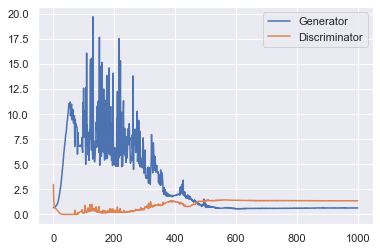

In [2]:
x = np.arange(n)
plt.plot(x,gloss, label = 'Generator')
plt.plot(x,dloss, label = 'Discriminator')
plt.legend()

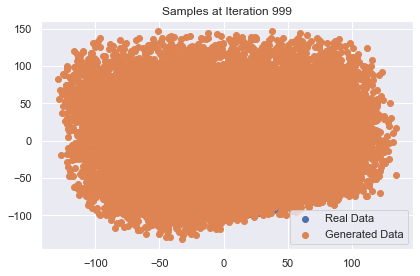

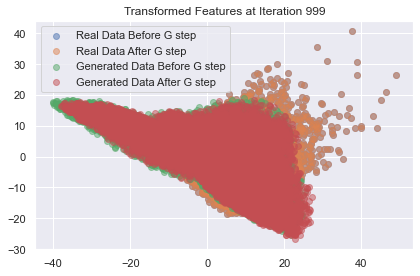

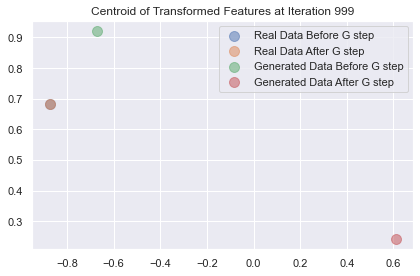

In [3]:
plt.figure()
g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
xax = plt.scatter(x_plot[:,0], x_plot[:,1])
gax = plt.scatter(g_plot[:,0],g_plot[:,1])

plt.legend((xax,gax), ("Real Data","Generated Data"))
plt.title('Samples at Iteration %d'%i)
plt.tight_layout()


plt.figure()
rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
plt.title('Transformed Features at Iteration %d'%i)
plt.tight_layout()

plt.figure()

rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

plt.title('Centroid of Transformed Features at Iteration %d'%i)
plt.tight_layout()

# Part 2

In [4]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(4,1), n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 2)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1]))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv1D(128, (1), strides=(1), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv1D(128, (1), strides=(1), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 2)(in_label)
	# linear multiplication
	n_nodes = 4 * 1
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((4, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 4
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((4,128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv1DTranspose(128, (1), strides=(1), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv1DTranspose(128, (1), strides=(1), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv1D(1, (1), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model


# # select real samples
def generate_real_samples(Ntrain, params):
    train, train_vals = train_dataV4(p,Ntrain)
    y = ones((Ntrain, 1))
    X = np.array(train), np.array(train_vals)
    return train, train_vals,y

# generate points in latent space as input for the generator
def generate_latent_points(Ntrain, params, n_classes=2):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(Ntrain, params):
    y = ones((Ntrain, 1))
    return np.random.uniform(-1., 1., size=[Ntrain*2, params]),y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset,labels,y, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, labels_real, y_real = generate_real_samples(Ntrain, params)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = params
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset,labels,y = generate_real_samples(Ntrain, params)
# train model
train(g_model, d_model, gan_model, dataset,labels,y, latent_dim)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
test,test_vals = test_data(p,Ntrain)

gan_model.predict([test,test_vals])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


array([[0.4834368 ],
       [0.49154982],
       [0.4835598 ],
       ...,
       [0.48323324],
       [0.48215705],
       [0.48335123]], dtype=float32)

# References

"How to Develop a Conditional GAN (cGAN) From Scratch", Jason Brownlee, https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/